# EC1B1 Coursework Code (Group 59)

## 4.1 Downloading the Data

In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

spain_data = pd.read_excel('Data/spain_data.xlsx', header = 2)
us_data = pd.read_excel('Data/us_data.xlsx', header = 2)

In [2]:
spain_column_names = ['Date', 'Spain: Industrial production', 'Spain: Exchange rates relative to the US dollar', 'Spain: International Reserves and Liquidity', 'Spain: Consumer prices']
spain_data.columns = spain_column_names

In [3]:
us_column_names = ['Date', 'US: International Reserves and Liquidity', 'US: Consumer prices']
us_data.columns = us_column_names

In [4]:
data = pd.merge(spain_data, us_data, on='Date')
data

,Date,Spain: Industrial production,Spain: Exchange rates relative to the US dollar,Spain: International Reserves and Liquidity,Spain: Consumer prices,US: International Reserves and Liquidity,US: Consumer prices
0,Jan 1960,NaN,60.000,233.000000,2.857368,21478.100000,13.436946
1,Feb 1960,NaN,60.000,253.000000,2.855049,21395.700000,13.482806
2,Mar 1960,NaN,60.000,299.000000,2.851573,21344.700000,13.482806
3,Apr 1960,NaN,60.000,326.000000,2.853891,21278.000000,13.528666
4,May 1960,NaN,60.000,360.000000,2.845198,21234.300000,13.528666
...,...,...,...,...,...,...,...
367,Aug 1990,57.138375,97.029,53227.717281,52.200576,78908.838357,60.351608
368,Sep 1990,97.803577,98.467,53790.187718,52.750025,80024.166133,60.856066
369,Oct 1990,100.909947,95.697,55428.040577,53.218335,82852.196532,61.222946
370,Nov 1990,104.110449,93.958,56347.862332,53.165017,83059.402774,61.360525


## 4.2 Cleaning the data

In [5]:
# (i) log exchange rate
er = data['Spain: Exchange rates relative to the US dollar'].tolist()
log_er = []
for value in er:
    log = math.log(value)
    log_er.append(log)

In [6]:
# (ii) difference in the log exchange rate versus the previous month
log_dif_list = []
for i in range(0, len(er)-1):
    log_dif = log_er[i+1] - log_er[i]
    log_dif_list.append(log_dif)


In [16]:
# (iii) monthly inflation rate
spain_cpi = data['Spain: Consumer prices'].tolist()
mon_inf_list = []
for i in range(0, len(er)-1):
    inf = math.log(spain_cpi[i+1] / spain_cpi[i])
    mon_inf_list.append(inf)

In [8]:
# (iv) log industrial production
ip = data['Spain: Industrial production'].tolist()
log_ip = []
for value in ip:
    log = math.log(value)
    log_ip.append(log)

In [9]:
# (v) monthly growth in industrial production
indsutrial_growth_list = []
for i in range(0, len(ip)-1):
    growth = math.log(ip[i+1] / ip[i])
    indsutrial_growth_list.append(growth)


In [10]:
# (vi) growth in industrial production versus 12 months ago
tw_mon_prod = []
k = 0
while k < 301:
    growth = math.log(ip[k+12] / ip[k])
    tw_mon_prod.append(growth)
    k = k+12

tw_mon_prod

[nan,
 0.16724721874710474,
 0.09226397673798262,
 0.10298481455743122,
 0.043596647505758174,
 0.1593352806961582,
 0.08704109599642261,
 0.04568754940575614,
 0.14914127674059127,
 0.09538355006738991,
 0.027022150804740137,
 0.13495860504566237,
 0.15658413207715646,
 0.13395367584948517,
 -0.12052828430668718,
 0.0028129413766142144,
 0.09249723842771085,
 0.05601962368129195,
 0.03450669541578175,
 0.021978906718776035,
 -0.05406722127027676,
 -0.03190454651874419,
 0.05577202792538803,
 0.033626356580279654,
 0.02477604209943735,
 -0.0033426214966892805]

In [11]:
# (vii) index of the value of international reserves (value of reserves at January 1960 = 100)
reserves_index = data['Spain: International Reserves and Liquidity'].tolist()
reserves_index_list = []
for reserve in reserves_index:
    index = reserve/reserves_index[0] * 100
    reserves_index_list.append(index)

In [17]:
# US monthly inflation rate
us_cpi = data['US: Consumer prices'].tolist()
mon_inf_list_2 = []

for i in range(0, len(er)-1):
    inf = math.log(us_cpi[i+1] / us_cpi[i])
    mon_inf_list_2.append(inf)

In [13]:
# US index of the value of international reserves (value of reserves at January 1960 = 100)
reserves_index = data['US: International Reserves and Liquidity'].tolist()
reserves_index_list_2 = []
for reserve in reserves_index:
    index = reserve/reserves_index[0] * 100
    reserves_index_list_2.append(index)

In [30]:
# monthly real exchange rate 
# first create the relative prices

rel_price_list = []
for i in range(0, 372):
  rel_price = (spain_cpi[i] / us_cpi[i])
  rel_price_list.append(rel_price)

In [19]:
# real exchange rate growth is simply the the exchange rate growth will be the same as formulas as the nominal
# but with the realtive price for each month multiplied by the exchange rate for the respecitve month

real_er_growth_list = []
for i in range(0, len(er)-1):
    real_er_growth = (math.log(er[i+1])*rel_price_list[i+1]) - (math.log(er[i])*rel_price_list[i])
    real_er_growth_list.append(real_er_growth)


In [36]:
dates = data['Date'].tolist()
len(dates)
dates.pop(371)

dates2 = data['Date'].tolist()

## 5.3 Analysis

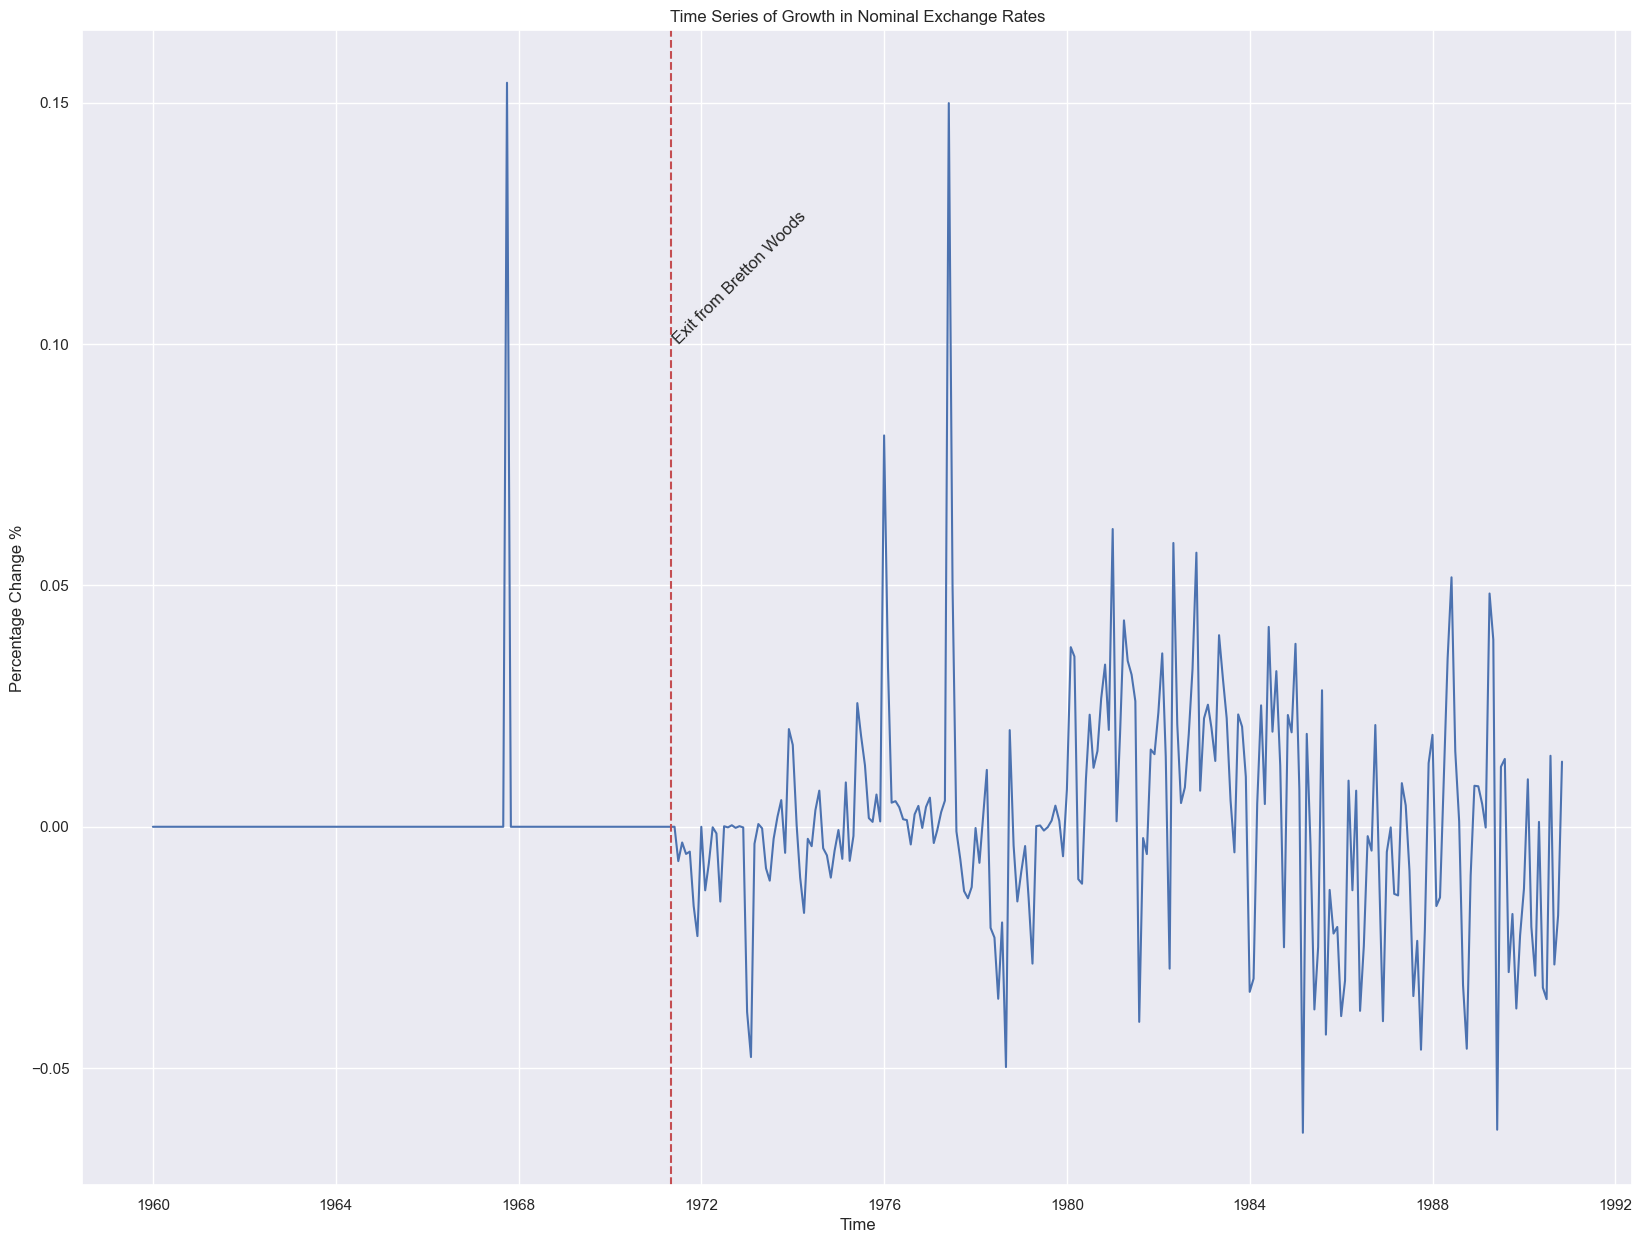

In [24]:
#Plot a time series graph of the monthly growth in nominal exchange rates
sns.lineplot(y = log_dif_list, x = dates)
sns.set(rc={'figure.figsize':(20,15)})

plt.title('Time Series of Growth in Nominal Exchange Rates')
plt.xlabel('Time')
plt.ylabel('Percentage Change %')

target_date = pd.Timestamp('1971-05-01')
plt.axvline(x=target_date, linestyle='--', color='r')
plt.text(target_date, 0.100, 'Exit from Bretton Woods', rotation=45);

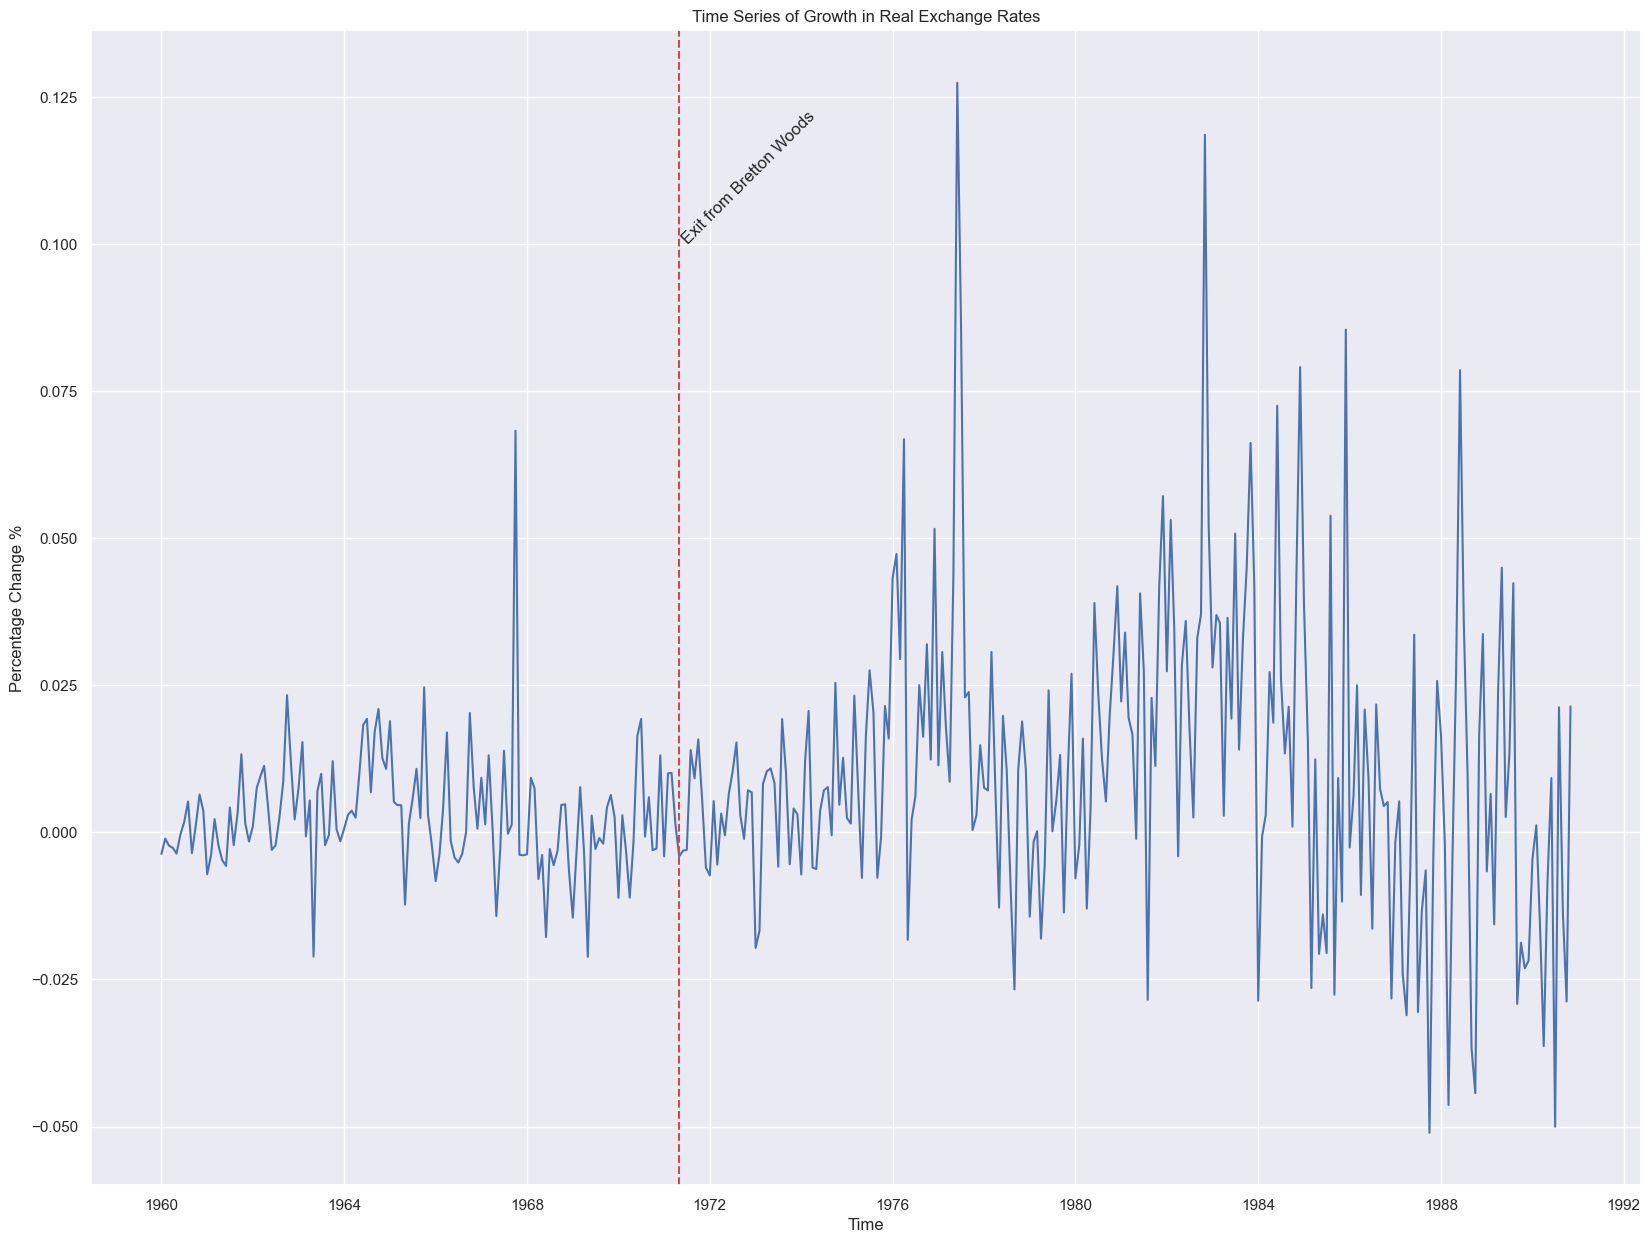

In [25]:
#Plot a time series graph of the monthly growth in real exchange rates
sns.set(style="darkgrid")

sns.lineplot(y = real_er_growth_list, x = dates)

plt.title('Time Series of Growth in Real Exchange Rates')
plt.xlabel('Time')
plt.ylabel('Percentage Change %')

target_date = pd.Timestamp('1971-05-01')
plt.axvline(x=target_date, linestyle='--', color='r')
plt.text(target_date, 0.100, 'Exit from Bretton Woods', rotation=45);

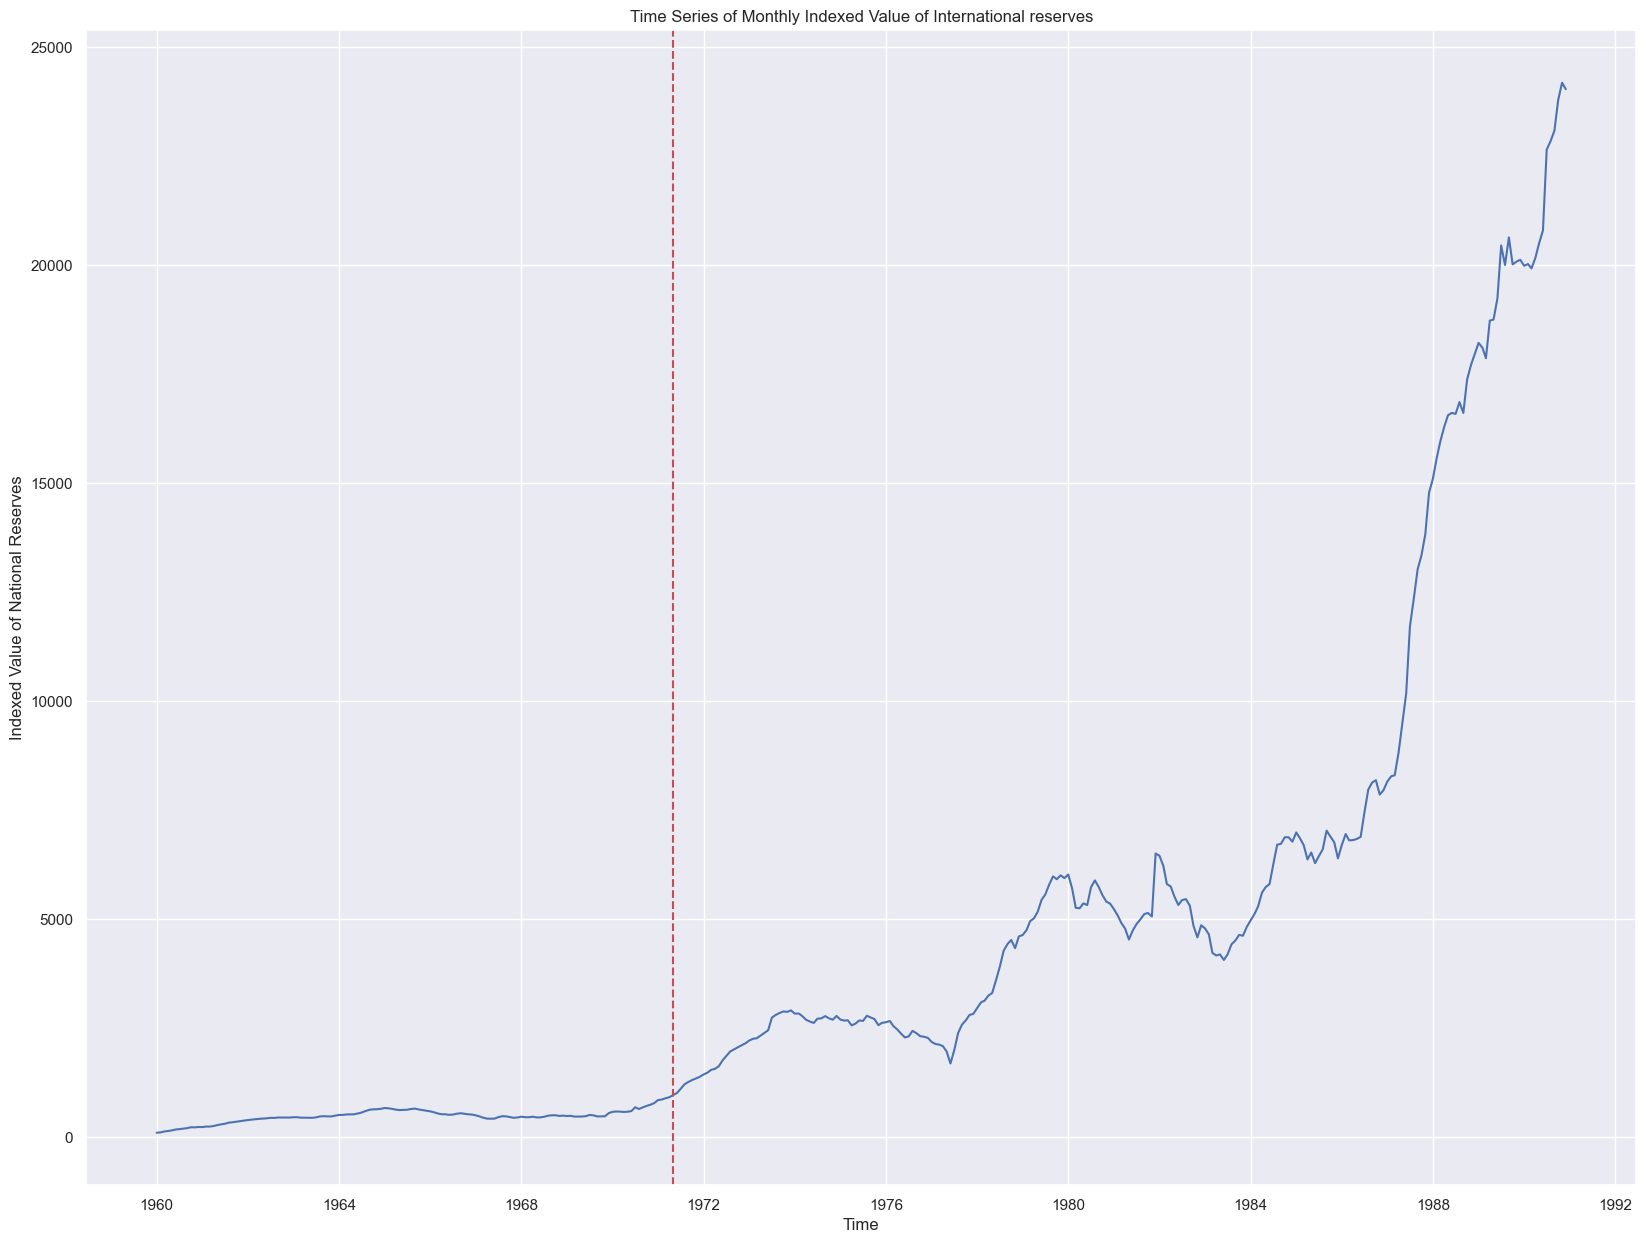

In [27]:
#Plot a time series graph of the monthly indexed value of international reserves of your country and the US from January 1960 until the exit of the US from Bretton Woods.

sns.set(style="darkgrid")

sns.lineplot(y = reserves_index_list, x = dates2)

plt.title('Time Series of Monthly Indexed Value of International reserves')

plt.xlabel('Time')

plt.ylabel('Indexed Value of National Reserves')

target_date = pd.Timestamp('1971-05-01')
plt.axvline(x=target_date, linestyle='--', color='r');

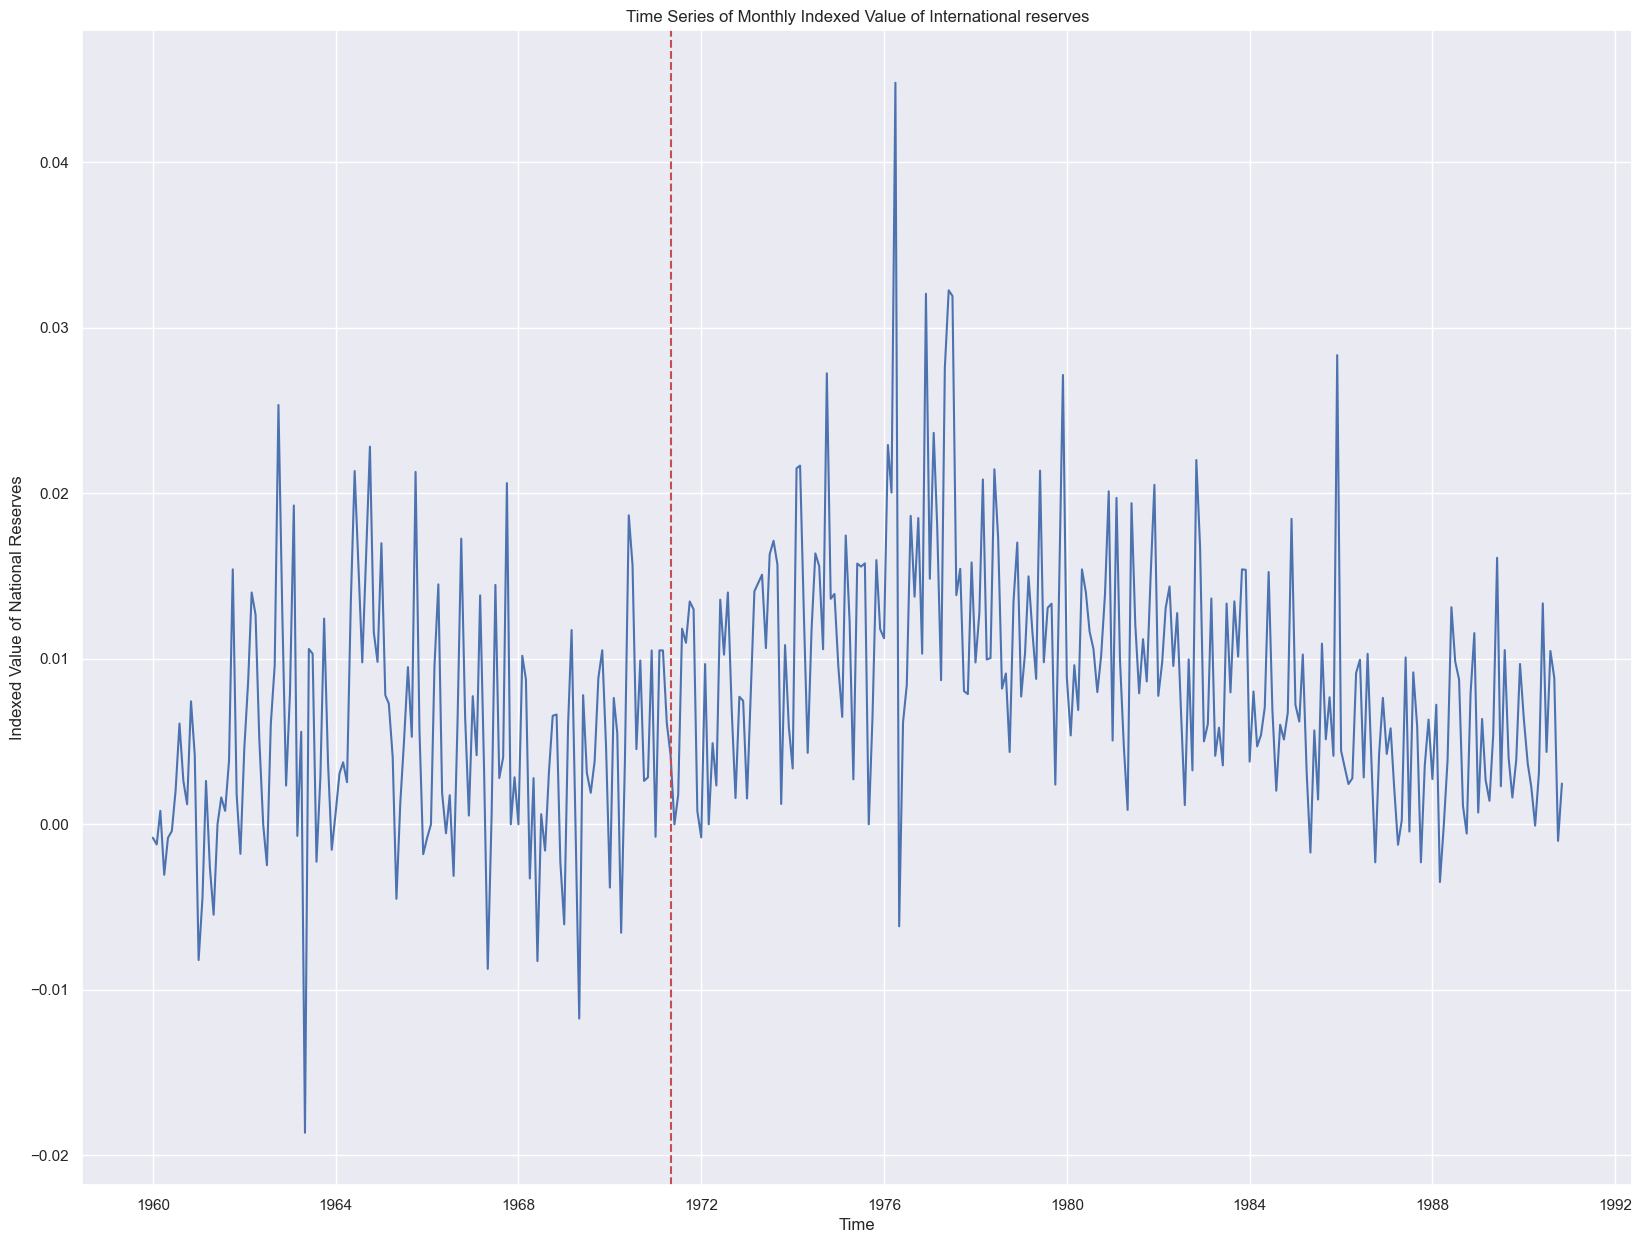

In [29]:
#time series of monthly inflation
sns.set(style="darkgrid")

sns.lineplot(y = mon_inf_list, x = dates)

plt.title('Time Series of Monthly Indexed Value of International reserves')

plt.xlabel('Time')

plt.ylabel('Indexed Value of National Reserves')

target_date = pd.Timestamp('1971-05-01')
plt.axvline(x=target_date, linestyle='--', color='r');